# Using SVM do regression

## wiki [link](https://en.wikipedia.org/wiki/Support_vector_machine#Regression)

A version of SVM for regression was proposed in 1996 by Vladimir N. Vapnik, Harris Drucker, Christopher J. C. Burges, Linda Kaufman and Alexander J. Smola. This method is called support vector regression (SVR). The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by SVR depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction. Another SVM version known as least squares support vector machine (LS-SVM) has been proposed by Suykens and Vandewalle.

Training the original SVR means solving

minimize ${\displaystyle {\frac {1}{2}}\|w\|^{2}}$

subject to ${\displaystyle {\begin{cases}y_{i}-\langle w,x_{i}\rangle -b\leq \varepsilon \\\langle w,x_{i}\rangle +b-y_{i}\leq \varepsilon \end{cases}}} $
where ${\displaystyle x_{i}}$ is a training sample with target value ${\displaystyle y_{i}}$. The inner product plus intercept ${\displaystyle \langle w,x_{i}\rangle +b}$ is the prediction for that sample, and ${\displaystyle \varepsilon }$ is a free parameter that serves as a threshold: all predictions have to be within an ${\displaystyle \varepsilon }$ range of the true predictions. Slack variables are usually added into the above to allow for errors and to allow approximation in the case the above problem is infeasible.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Svr_epsilons_demo.svg">

$\varepsilon$越大，允许的误差范围就越大

- http://www.robots.ox.ac.uk/~az/lectures/ml/
- http://www.svms.org/regression/SmSc98.pdf
- http://svms.org/tutorials/Gunn1998.pdf
- https://cn.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

## An Example
- http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

Automatically created module for IPython interactive environment


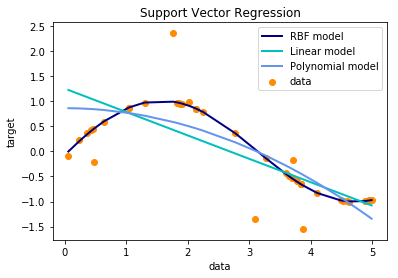

In [5]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.01)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.savefig('example_SVR_1.png', dpi=200)
# plt.show()

In [3]:
y

array([ 1.26676326,  0.24908617,  0.3547268 ,  0.60508501,  0.80558322,
        0.73862292,  0.99971819,  0.99913522,  0.98216893,  0.96929906,
        0.67569163,  0.8080949 ,  0.64030547,  0.63822945,  0.60885156,
        0.90545958,  0.52432397,  0.50301796,  0.43150228,  0.28310435,
        1.08084544,  0.25088738, -0.02288449, -0.36260628, -0.49433258,
        0.5098226 , -0.58816107, -0.66524594, -0.67629795, -0.69038867,
       -1.95706922, -0.92627641, -0.937215  , -0.93743767, -0.95317115,
       -0.71257359, -0.98427415, -0.99108693, -0.99709302, -0.99462839])

### Another example
- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb

In [15]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()  # 将多维数组降为一维
type(y), y.shape, type(X), X.shape

(numpy.ndarray, (50,), numpy.ndarray, (50, 1))

In [16]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

线性SVR的超参数，$\epsilon$

The soft margin loss setting corresponds for a linear SVR
![alt text](The-soft-margin-loss-setting-for-a-linear-SVM.png)

In [20]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)  
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)  # 返回误差绝对值大于epsilon的点的index

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([ 6.52640746])

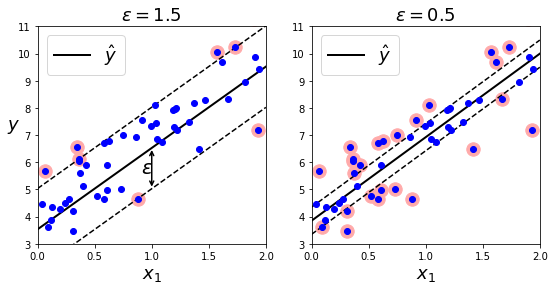

In [14]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")  # 预测的回归线
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")  # 回归线向上平移epsilon
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")  # 回归线向下平移epsilon
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))  # width, height in inches
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])  # 后面是坐标轴的范围
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)  # 可以设置旋转角度
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()